In [1]:
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrangle as w

import seaborn as sns
from math import sqrt
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer as qt

# Exercises Plan of Action:
   - Acquire 
   - Prepare
   - Answer the exercises questions

## Acquire the data that we will be using to answer the following questions 

In [2]:
train, val, test= w.wrangle_zillow()

In [3]:
train.head()

,Unnamed: 0,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
1567873,1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0
1218138,1218138,1950.0,1345206.0,16539.04,2.0,2.0,1326.0,6037.0
339661,339661,1953.0,356648.0,4575.16,2.0,1.0,1053.0,6037.0
1017133,1017133,1946.0,175069.0,2635.51,3.0,2.0,1256.0,6037.0
40250,40250,1957.0,543000.0,6344.96,3.0,2.0,1640.0,6059.0


In [4]:
train.drop(columns= ['Unnamed: 0'], inplace= True)
val.drop(columns= ['Unnamed: 0'], inplace= True)
test.drop(columns= ['Unnamed: 0'], inplace= True)

In [5]:
# fit
columns_to_scale = ['bedrooms', 'bathrooms', 'sqr_feet', 'tax_amount']

In [6]:
# make the object
scaler = MinMaxScaler()

In [8]:
train_scaled = train.copy()

# fit to the data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

Text(0.5, 1.0, 'Scaled Data')

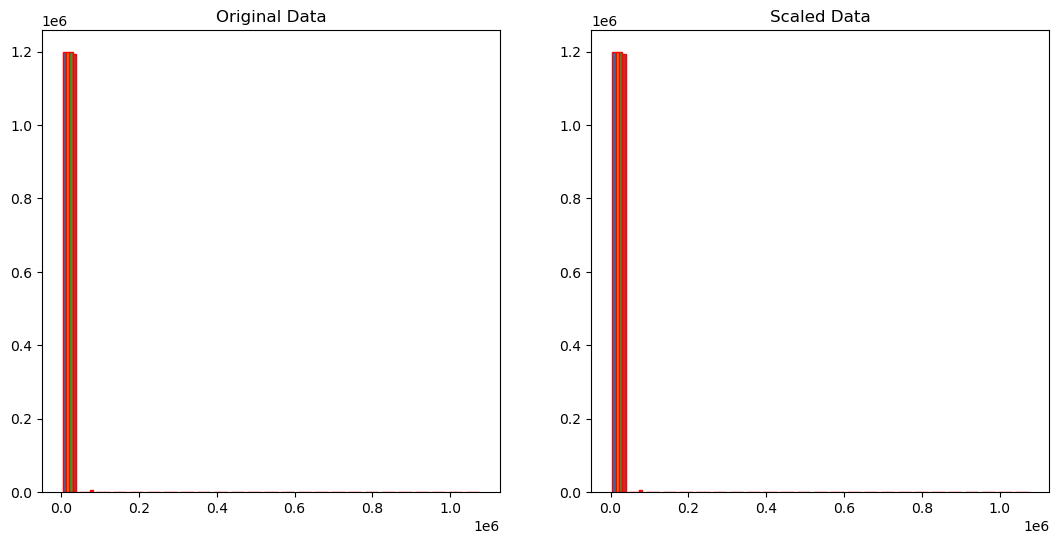

In [9]:
#minmax 
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[columns_to_scale], bins=25, ec='red')
plt.title('Original Data')
plt.subplot(122)
plt.hist(train[columns_to_scale], bins=25, ec='red')
plt.title('Scaled Data')

# Q1

In [13]:
def visualize_scaler(scaler, df, cols_to_scale, bins= 10):
    '''
    takes in a scaled dataframe then graphs it
    '''
    fig, axs= plt.subplots(len(cols_to_scale), 2, figsize= (16,9))
    df_scaled= df.copy()
    df_scaled[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title= f'{col} Before Scaling', xlabel= col, ylabel= 'Count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title= f'{col} After Scaling With {scaler.__class__.__name__}', xlabel= col, ylabel= 'Count')
    plt.tight_layout()

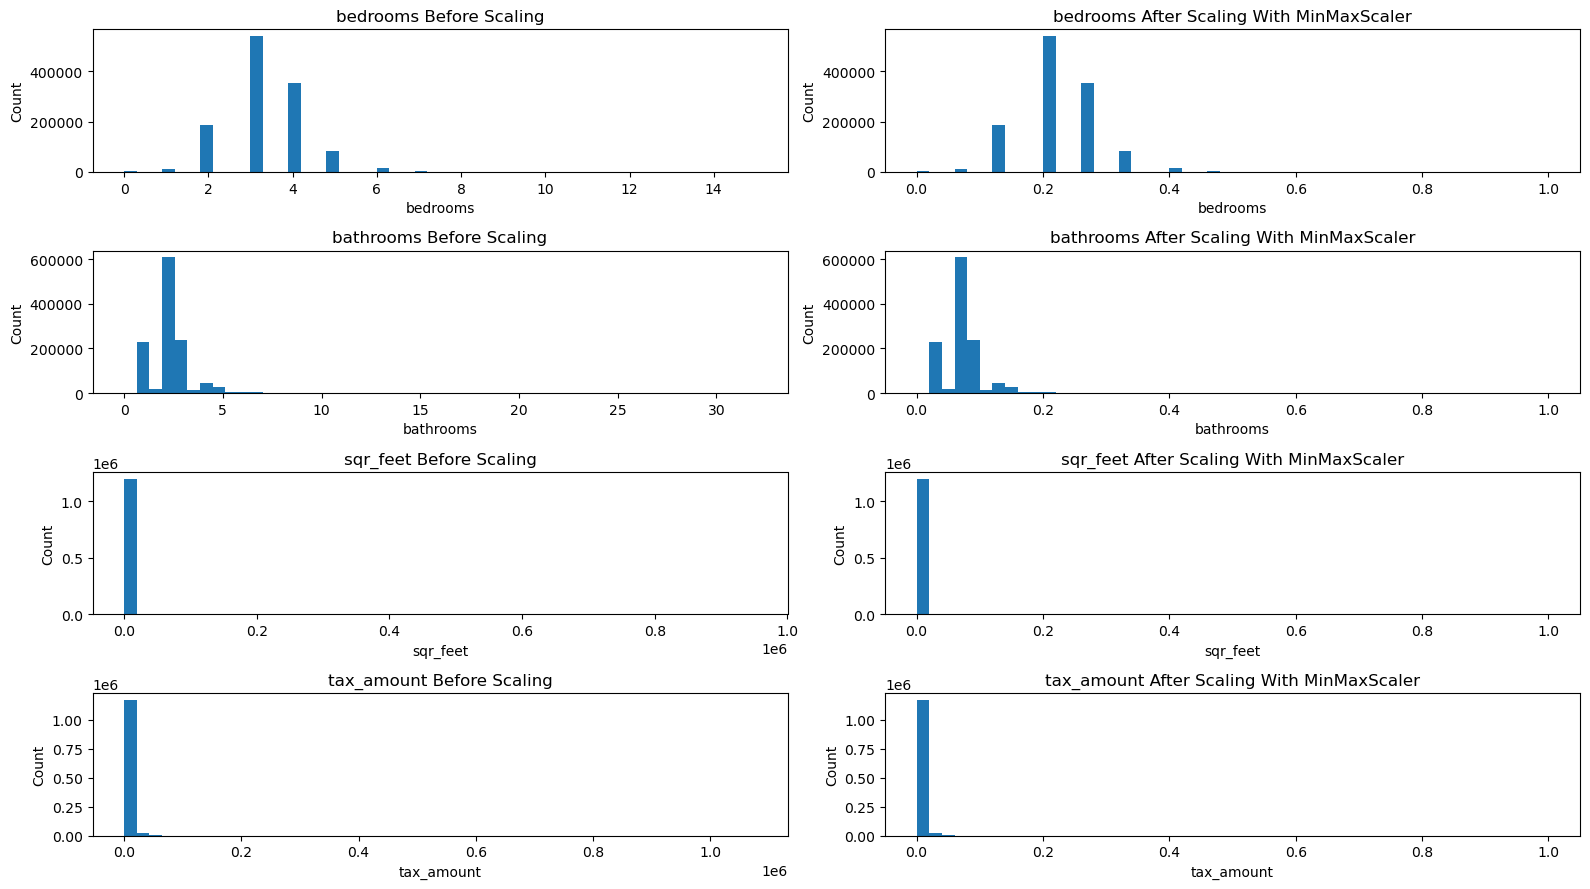

In [14]:
visualize_scaler(scaler= MinMaxScaler(), df= train, 
                 cols_to_scale= columns_to_scale, 
                 bins= 50)

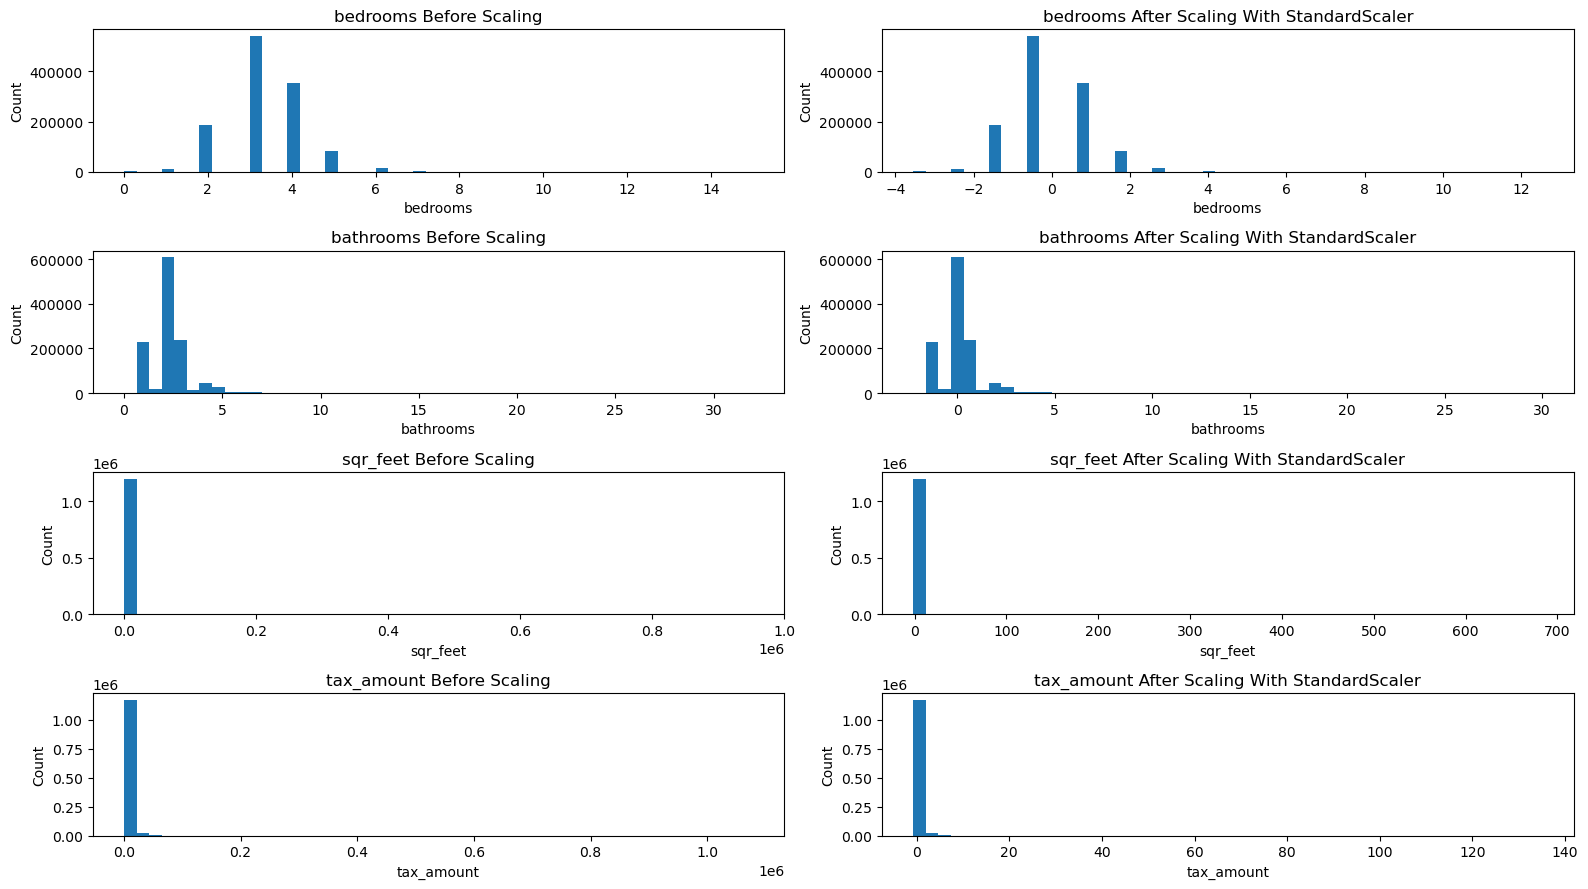

In [15]:

visualize_scaler(scaler= StandardScaler(), df= train, cols_to_scale= columns_to_scale, bins=50)

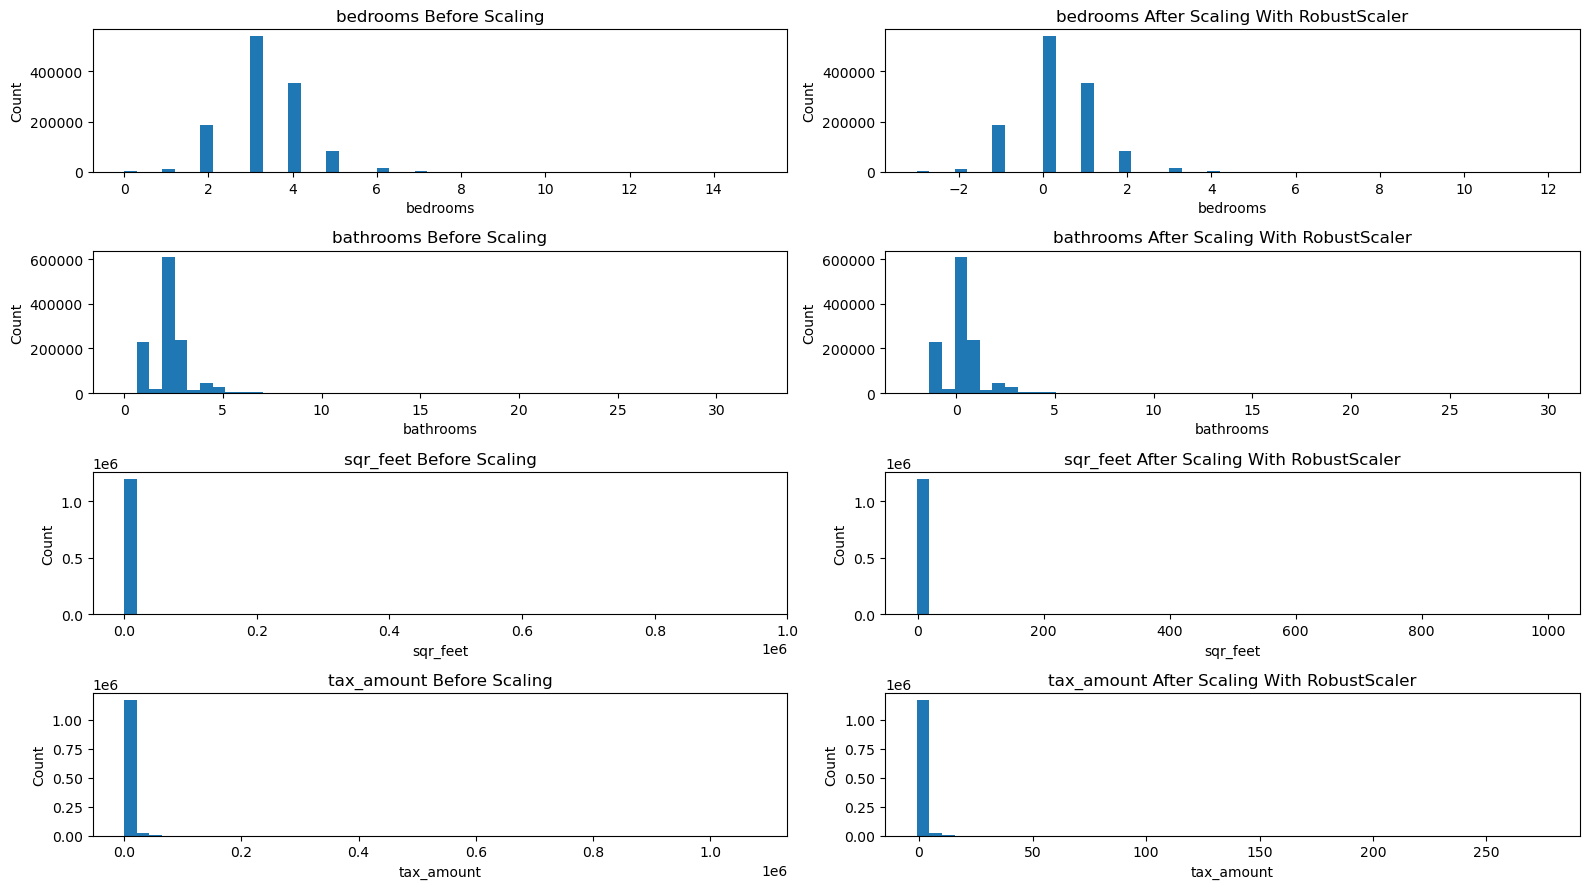

In [19]:

visualize_scaler(scaler= RobustScaler(), df= train, cols_to_scale= columns_to_scale, bins= 50)

# Q2

In [20]:
# create minmax for tax_amount
scaler_minmax= MinMaxScaler()

In [21]:
#fit
scaler_minmax.fit(train[['tax_amount']])

MinMaxScaler()

In [22]:
#use
train['minmax_tax_amount']= scaler_minmax.transform(train[['tax_amount']])

In [23]:
# inverse
train['mm_tx_inverse']= scaler_minmax.inverse_transform(train[['minmax_tax_amount']])

In [24]:
def vis_scaler_inverse(scaler, df, cols_to_scale, bins= 10):
    '''
   takes in a scaled dataframe and then plots it
    '''
    fig, axs= plt.subplots(len(columns_to_scale), 3, figsize= (16,9))
    df_scaled= df.copy()
    df_scaled[columns_to_scale]= scaler.fit_transform(df[cols_to_scale])
    df_inverse= df.copy()
    df_inverse[columns_to_scale]= scaler.inverse_transform(df[cols_to_scale])

    for (ax1, ax2, ax3), col in zip(axs, cols_to_scale):
        ax1.hist(df[col], bins= bins)
        ax1.set(title= f'{col} before scaling', xlabel= col, ylabel= 'count')
        ax2.hist(df_scaled[col], bins= bins)
        ax2.set(title= f'{col} after scaling with {scaler.__class__.__name__}', xlabel= col, ylabel= 'Count')
        ax3.hist(df_inverse[col], bins=bins)
        ax3.set(title= f'{col} after inverse transform {scaler.__class__.__name__}', xlabel= col, ylabel= 'Count')
    plt.tight_layout()

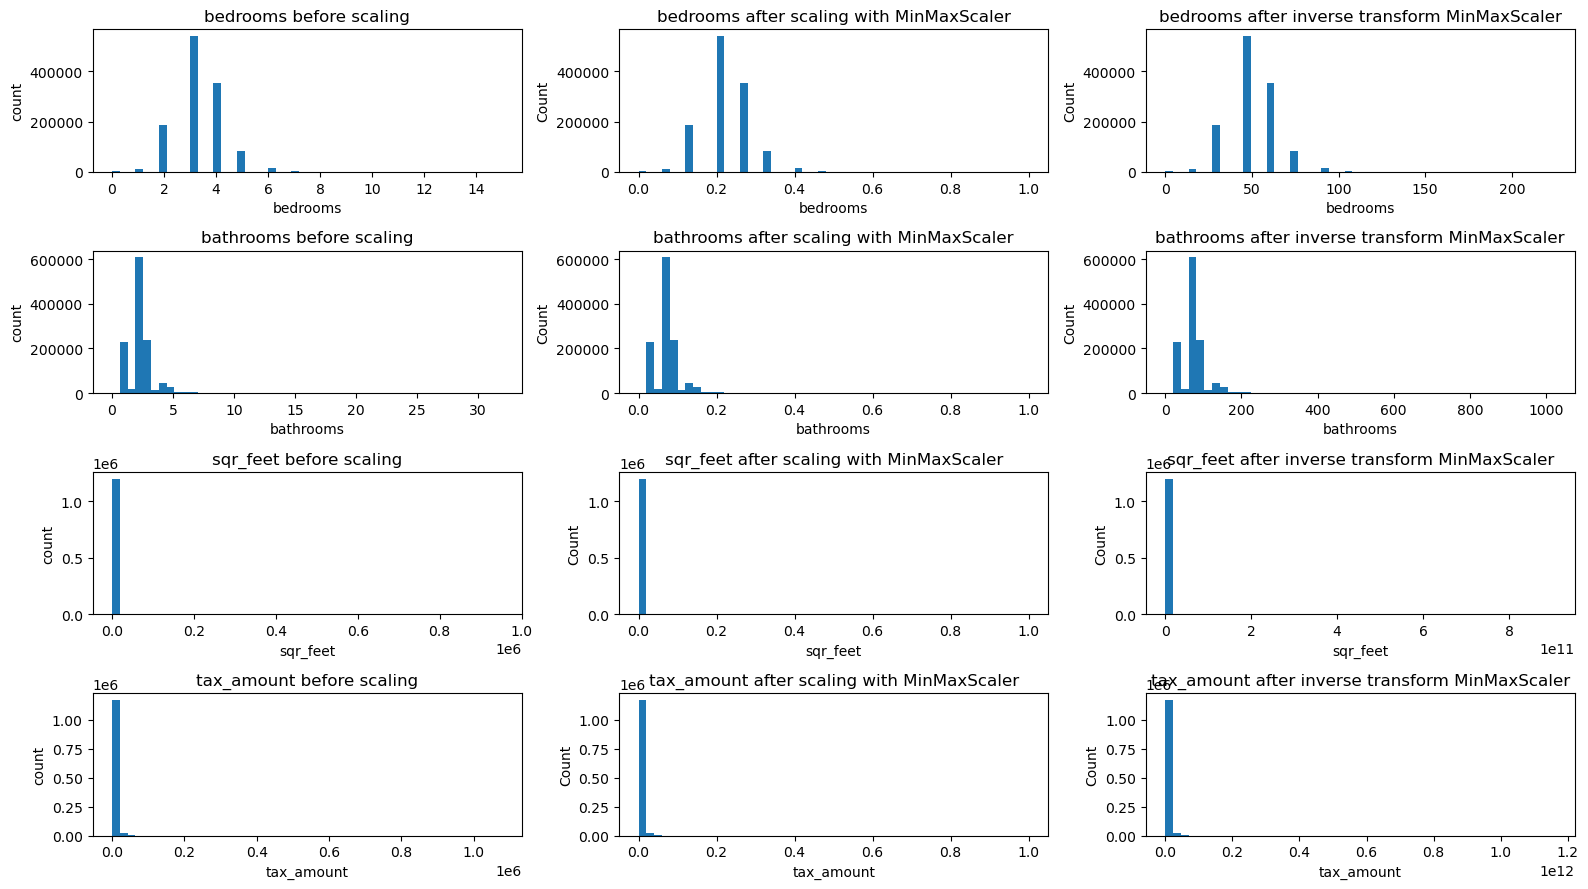

In [25]:
vis_scaler_inverse(scaler=MinMaxScaler(), 
                 df=train, 
                 cols_to_scale=columns_to_scale, 
                 bins=50)

# Q3

In [32]:
#Use QuantileTransformer on 'tax_amount'

#create
quantile_mc= qt(output_distribution= 'normal')

In [33]:
#fit
quantile_mc.fit(train[['tax_amount']])

QuantileTransformer(output_distribution='normal')

In [34]:
#transform and create columns
train['tax_amount_quantile']= quantile_mc.transform(train[['tax_amount']])

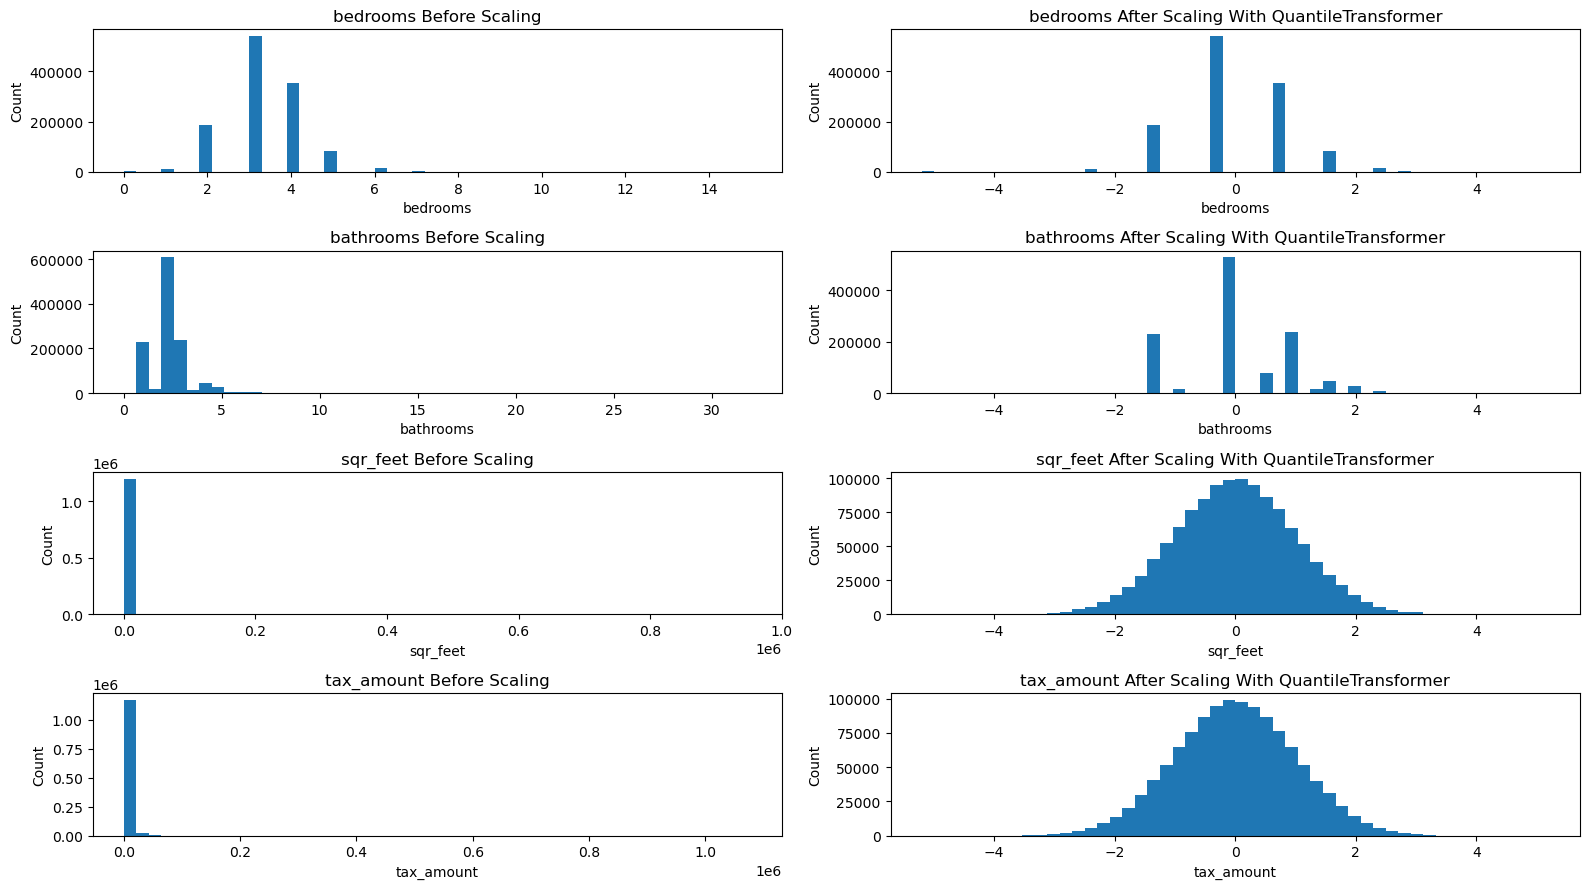

In [36]:
visualize_scaler(scaler= qt(output_distribution= 'normal'), df= train, 
                 cols_to_scale= columns_to_scale, 
                 bins= 50)

# Q4

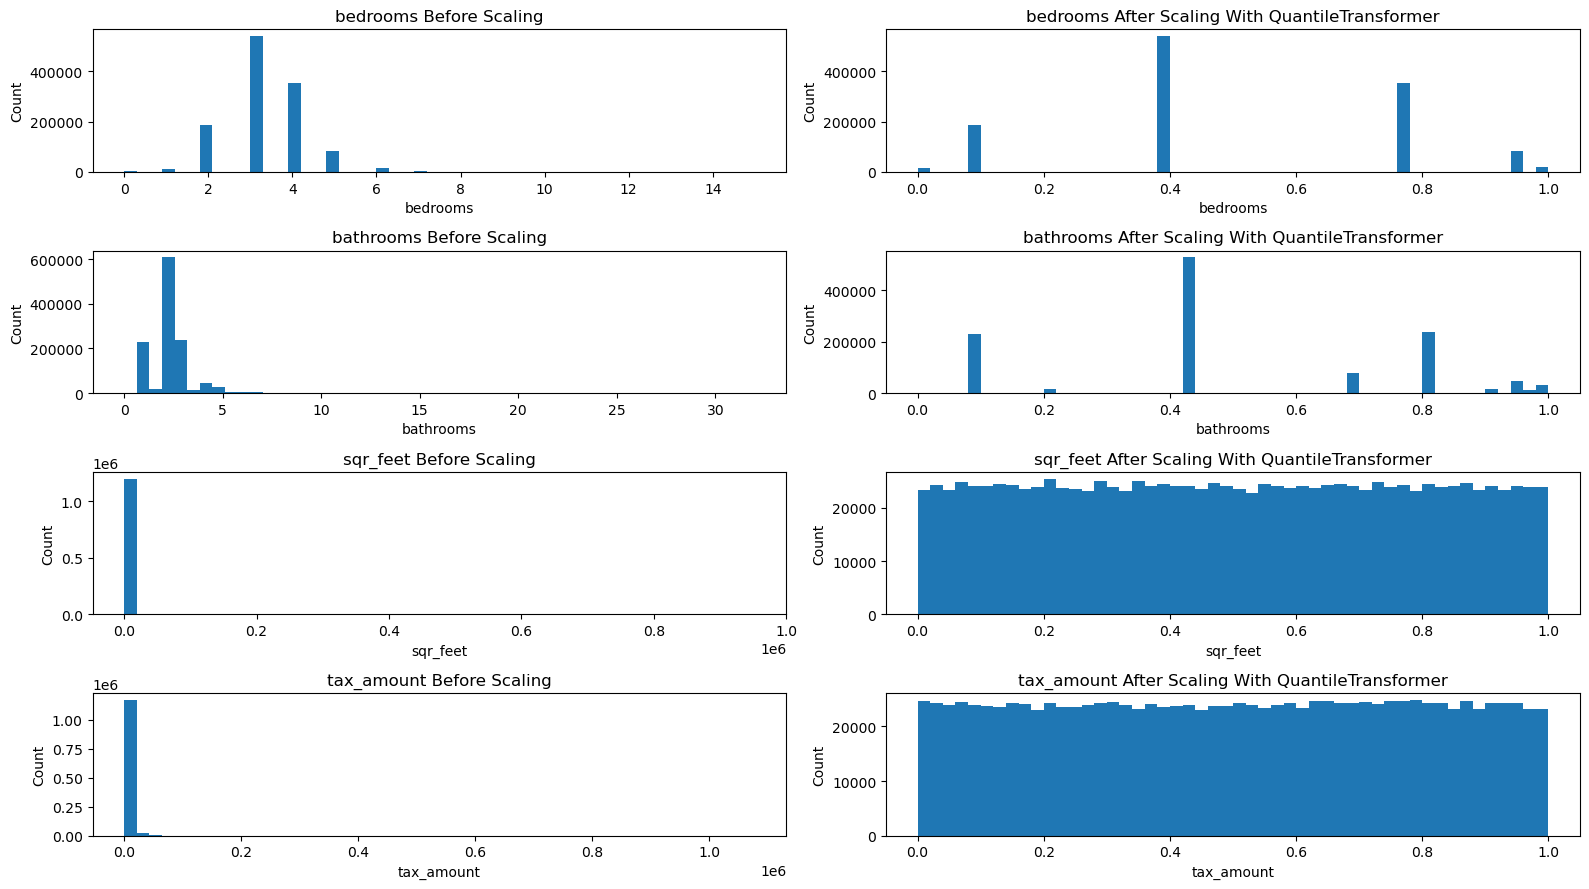

In [37]:
visualize_scaler(scaler= qt(), df= train, 
                 cols_to_scale= columns_to_scale, 
                 bins= 50)

# Q5